#### **Necessary Package Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots                             # for determining ARIMA orders

import statsmodels.api as sm

from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

### **Q.1 For the following data series, find the first four lags of autocovariance (ɤ0 , ɤ1, ɤ2, ɤ3) and auto correlation function (ƿ0 , ƿ1 , ƿ2, ƿ3) manually.**

In [ ]:
Q1 = (2.34, 1.47, 1.13, 0.62, 1.51, 0.78, -0.02, 1.04, 0.80, 1.42)
Q1
n = len(Q1)
total = sum(Q1)
mean = total/n
print('number =', n)
print('mean =', mean)
print('total =', total)

number = 10
mean = 1.1090000000000002
total = 11.090000000000002


In [ ]:
# Calculating autocovariance 
ɤ0 = sum([(Q1[i] - mean)**2 for i in range(n)])/n
ɤ1 = sum([(Q1[i] - mean) * (Q1[i-1] - mean) for i in range(1, n)])/n
ɤ2 = sum([(Q1[i] - mean) * (Q1[i-2] - mean) for i in range(2, n)])/n
ɤ3 = sum([(Q1[i] - mean) * (Q1[i-3] - mean) for i in range(3, n)])/n

# Calculating autocorrelation
ƿ0 = 1
ƿ1 = ɤ1/ɤ0
ƿ2 = ɤ2/ɤ0
ƿ3 = ɤ3/ɤ0

print("Autocovariance: ", ɤ0, ɤ1, ɤ2, ɤ3)
print("Autocorrelation: ", ƿ0, ƿ1, ƿ2, ƿ3)

Autocovariance:  0.36258899999999994 0.048824900000000025 -0.008400199999999988 -0.01891529999999995
Autocorrelation:  1 0.13465631886240353 -0.02316727755116672 -0.052167329952094395


### **Q.2 For the following data series of 30 observations, plot ACF and PACF and Identify the suitable model and Coefficients (Hint: can use auto_arima method)?**

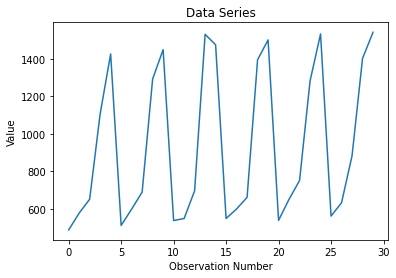

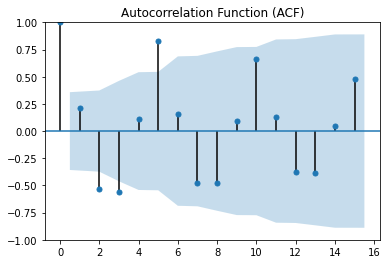

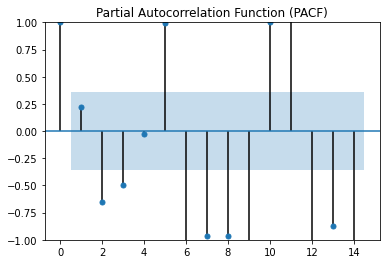

Best ARIMA model:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                        SARIMAX   Log Likelihood                -222.590
Date:                Sun, 05 Feb 2023   AIC                            449.179
Time:                        03:45:52   BIC                            451.982
Sample:                             0   HQIC                           450.076
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    935.4667    100.439      9.314      0.000     738.610    1132.323
sigma2       1.63e+05   1.32e+05      1.235      0.217   -9.56e+04    4.22e+05
Ljung-Box (L1) (Q):               

In [ ]:
Q2 = pd.DataFrame({'a':[487, 577, 651, 1107, 1427,
                        511, 598, 689, 1293, 1450,
                        537, 548, 696, 1532, 1476,
                        548, 599, 661, 1396, 1502,
                        538, 651, 751, 1283, 1534,
                        561, 632, 883, 1403, 1543]})

x = [487, 577, 651, 1107, 1427,
     511, 598, 689, 1293, 1450,
     537, 548, 696, 1532, 1476,
     548, 599, 661, 1396, 1502,
     538, 651, 751, 1283, 1534,
     561, 632, 883, 1403, 1543]

# Plot the data series
plt.plot(x)
plt.xlabel("Observation Number")
plt.ylabel("Value")
plt.title("Data Series")
plt.show()

# Plot the autocorrelation function
plot_acf(Q2, title="Autocorrelation Function (ACF)")
plt.show()

# Plot the partial autocorrelation function
plot_pacf(Q2,lags = 14, title = "Partial Autocorrelation Function (PACF)")
plt.show()

# Use the auto_arima method to fit the ARIMA model
model = auto_arima(x, suppress_warnings=True, error_action="ignore")

# Print the ARIMA model coefficients
print("Best ARIMA model:", model.summary())

### **Q.3 For the following data , Add some dummy dates, do some analysis like Visualization and ADF-test and also list out your observation from data. (submit screenshots as well)**

            Value
2021-03-31   2.34
2021-04-30  -0.02
2021-05-31  -0.96
2021-06-30   2.70
2021-07-31   0.79
2021-08-31   1.47
2021-09-30   1.04
2021-10-31   0.29
2021-11-30   2.63
2021-12-31   1.89
2022-01-31   1.13
2022-02-28   0.80
2022-03-31   2.56
2022-04-30   2.44
2022-05-31   4.36
2022-06-30   0.62
2022-07-31   1.42
2022-08-31   3.33
2022-09-30   1.38
2022-10-31   2.23
2022-11-30   1.51
2022-12-31   1.15
2023-01-31   3.74
2023-02-28   1.11
2023-03-31   2.19
2023-04-30   0.78
2023-05-31   1.57
2023-06-30   2.88
2023-07-31   1.10
2023-08-31   0.59


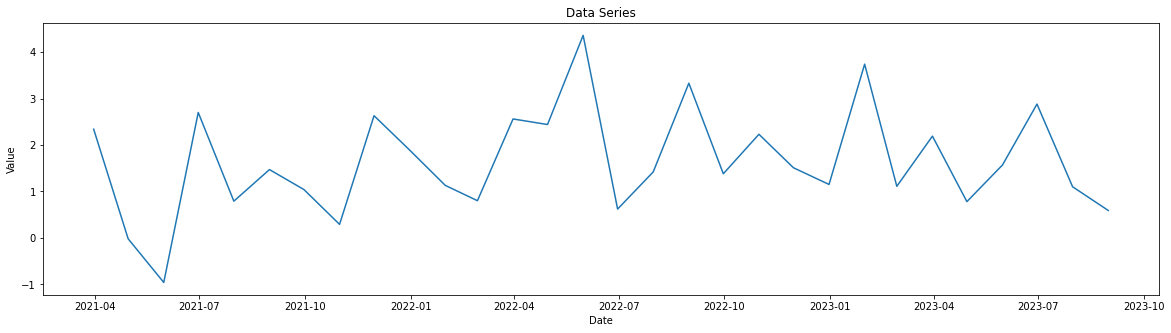

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

x = [2.34 ,-0.02, -0.96, 2.70 ,0.79 ,
     1.47, 1.04, 0.29, 2.63 ,1.89, 
     1.13 ,0.80, 2.56, 2.44, 4.36,
     0.62, 1.42, 3.33, 1.38, 2.23, 
     1.51, 1.15, 3.74, 1.11, 2.19,
     0.78, 1.57, 2.88, 1.10, 0.59]

#Q3=pd.DataFrame(x)
dates = pd.date_range("2021-03-03", periods=30, freq="M")
Q3 = pd.DataFrame(x, index=dates, columns=["Value"])
print(Q3)

# Plot the data
plt.figure(figsize=(20,5))
plt.plot(Q3)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Data Series")
plt.show()

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(Q3['Value'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.805622
p-value                  0.377674
# lags used              6.000000
# observations          23.000000
critical value (1%)     -3.752928
critical value (5%)     -2.998500
critical value (10%)    -2.638967
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


### **Q.4 For the given set of data, 3.65, 8.03, 5.72, 4.93, 5.71, 4.79, 4.87, 6.48, 6.40, 6.41 find the order of auto_arima model and check whether it is like ACF and PACF plots observations. If, not same then compare the two models and specify which is the better model and how we decide..**

Best ARIMA model:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                        SARIMAX   Log Likelihood                 -15.632
Date:                Tue, 31 Jan 2023   AIC                             35.264
Time:                        05:48:14   BIC                             35.869
Sample:                             0   HQIC                            34.600
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.6990      0.371     15.378      0.000       4.973       6.425
sigma2         1.3344      0.642      2.080      0.038       0.077       2.592
Ljung-Box (L1) (Q):               

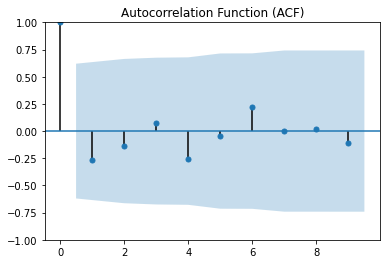

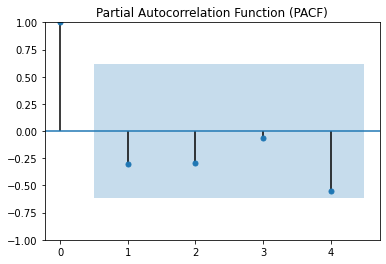

In [ ]:
y = np.array([3.65, 8.03, 5.72, 4.93, 5.71, 4.79, 4.87, 6.48, 6.40, 6.41])
Q4 =pd.DataFrame({'a':[3.65, 8.03, 5.72, 4.93, 5.71, 4.79, 4.87, 6.48, 6.40, 6.41]})

model = auto_arima(y, suppress_warnings=True, error_action="ignore")
print("Best ARIMA model:", model.summary())

# Plot the autocorrelation function
plot_acf(Q4, title="Autocorrelation Function (ACF)")
plt.show()

# Plot the partial autocorrelation function
plot_pacf(Q4, lags=4, title="Partial Autocorrelation Function (PACF)")
plt.show()